# Sales Conversion Optimization

In this notebook we are performing a Sales Conversion Optimization Analysis.
The data is taken from 3 different facebook ad campaigns. 
The aim of the campaign is assumed to be profit, we therefore take conversion as indicator for success.
The present analysis will look at relationships within the data, and then try to fit a machine learning model to predict conversion success of individual campaigns.


Link to kaggle challenge:

*https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking?resource=download*

----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/KAG_conversion_data.csv')

In [3]:
data.shape

(1143, 11)

## 1. Data Cleaning

In [4]:
## dropping unnecessary columns
data.drop("fb_campaign_id", axis=1, inplace=True)

### 2.1 Missing Values

In [5]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

### 2.2 Duplicates

In [6]:
data.duplicated().sum()

0

### 2.3 Outliers

In [7]:
data.head(2)

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,30-34,M,16,17861,2,1.82,2,0


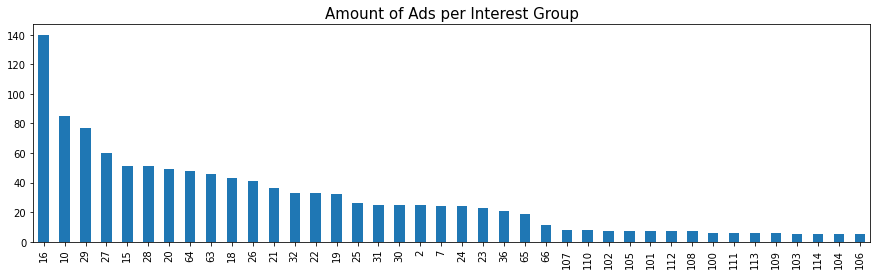

In [8]:
## checking for outliers in 'interst'
plt.figure(figsize=(15,4))
data.interest.value_counts().plot(kind="bar")
plt.title("Amount of Ads per Interest Group", size=15);

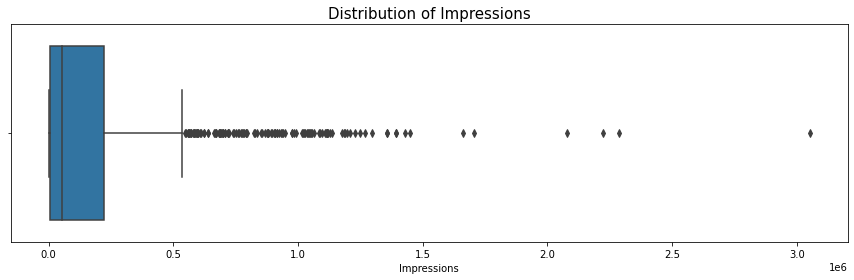

In [9]:
## checking for outliers in Impressions
plt.figure(figsize=(15,4))
sns.boxplot(x=data.Impressions)
plt.title("Distribution of Impressions", size=15);

In [10]:
## Inspecting Outliers
data.sort_values(by="Impressions", ascending=False)[:5]

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100,1178,30-34,M,15,3052003,340,639.949998,60,17
765,1121601,1178,45-49,M,16,2286228,353,603.380002,16,7
860,1121814,1178,30-34,F,27,2223278,421,612.300003,38,13
528,1121104,1178,30-34,M,16,2080666,202,360.150001,40,21
867,1121824,1178,30-34,F,29,1705246,295,429.479998,23,10


(Outliers are decided to be left in the dataset, as there is no evidence for them being wrong data entries)

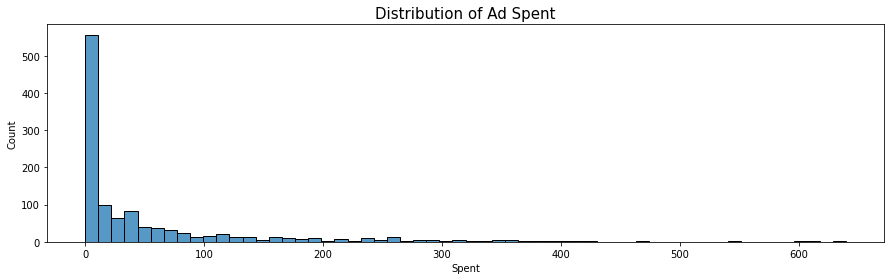

In [11]:
## checking for outliers in 'Spent'
plt.figure(figsize=(15,4))
sns.histplot(x=data.Spent)
plt.title("Distribution of Ad Spent", size=15);

In [12]:
## Inspecting Outliers
data.sort_values(by="Spent", ascending=False)[:5]

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
525,1121100,1178,30-34,M,15,3052003,340,639.949998,60,17
860,1121814,1178,30-34,F,27,2223278,421,612.300003,38,13
765,1121601,1178,45-49,M,16,2286228,353,603.380002,16,7
1026,1122265,1178,45-49,F,27,1428421,367,541.700002,10,0
995,1122193,1178,45-49,F,10,1358324,346,465.079998,8,2


(Outliers are decided to be left in the dataset, as there is no evidence for them being wrong data entries)

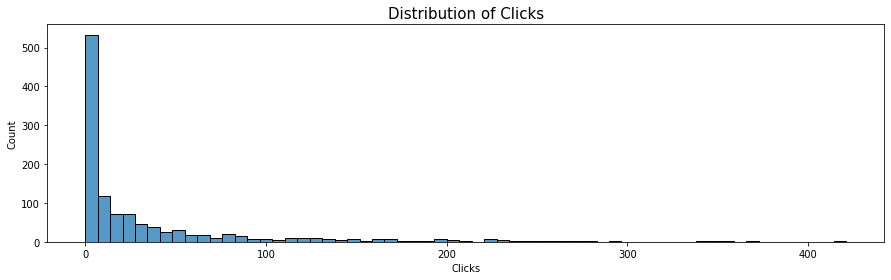

In [13]:
## checking for outliers in 'Clicks'
plt.figure(figsize=(15,4))
sns.histplot(x=data.Clicks)
plt.title("Distribution of Clicks", size=15);

In [14]:
## Inspecting Outliers
data.sort_values(by="Clicks", ascending=False)[:5]

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
860,1121814,1178,30-34,F,27,2223278,421,612.300003,38,13
1026,1122265,1178,45-49,F,27,1428421,367,541.700002,10,0
765,1121601,1178,45-49,M,16,2286228,353,603.380002,16,7
995,1122193,1178,45-49,F,10,1358324,346,465.079998,8,2
525,1121100,1178,30-34,M,15,3052003,340,639.949998,60,17


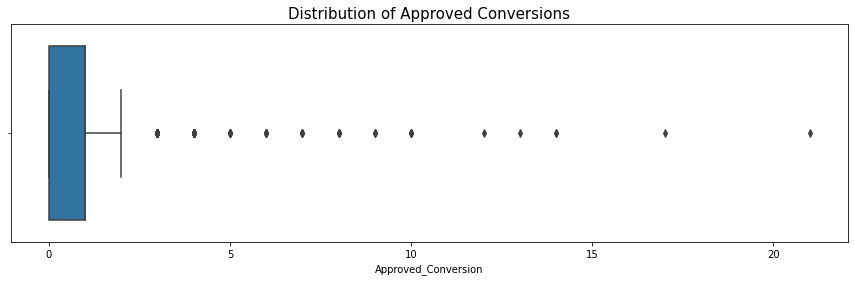

In [15]:
## checking outliers for conversions
plt.figure(figsize=(15,4))
sns.boxplot(x=data.Approved_Conversion)
plt.title("Distribution of Approved Conversions", size=15);

**Notes:**

The distributions for all continuous variables are highly skewed, with some extreme values compared to measures of centrality. The data appears to be real however, and represents actual, real phenomena (such as increases in ad spend correlating with increases in Impressions and Conversions; correlations are examined in the next section). 

These observations are therefore left in the dataset.

In [16]:
## changing values for campaign id
data["xyz_campaign_id"].replace({916:"campaign_a" ,936:"campaign_b" ,1178:"campaign_c"}, inplace=True)

## 2. Exploraroty Analysis

This section is analysing some interesting distributions and trends, such as ..

1. How many ads are there per ad - campaign?
2. How well do the campaigns perform compared to the others?
3. What is the average Ad Spent?
4. What is the correlation between Ad Spent, Impressions and Conversions?
5. Is there a linear relationship between Ad Spent and Impressions?

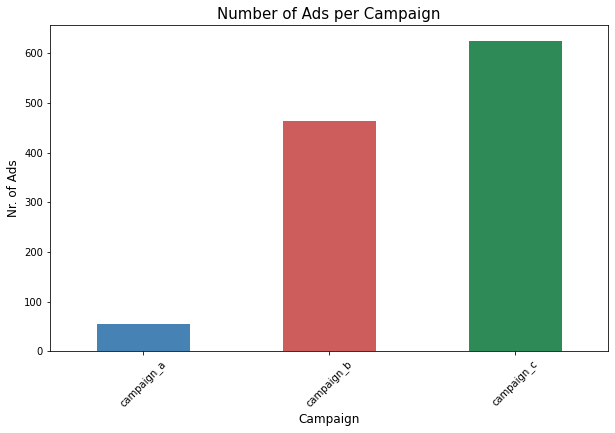

In [17]:
## Assessing number of ads per campaign
plt.figure(figsize=(10,6))
data.groupby("xyz_campaign_id")["ad_id"].nunique().plot(kind="bar", color=["steelblue", 
                                                                           "indianred", 
                                                                           "seagreen"])
plt.xticks(rotation=45)
plt.title("Number of Ads per Campaign", size=15)
plt.xlabel("Campaign", size=12)
plt.ylabel("Nr. of Ads", size=12);

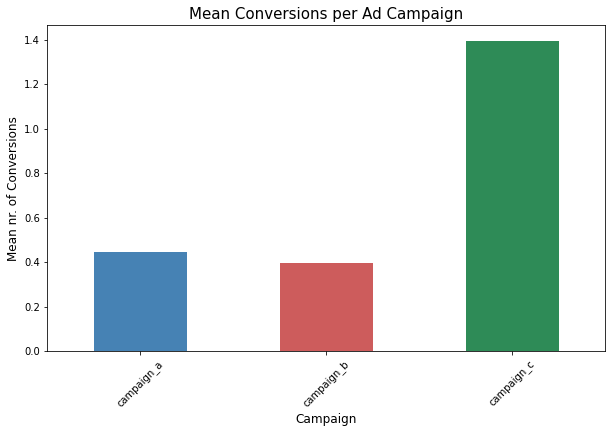

In [18]:
## assessing the relative performance of the campaigns, based on conversion success

plt.figure(figsize=(10,6))
data.groupby("xyz_campaign_id")["Approved_Conversion"].mean().plot(kind="bar", color=["steelblue", 
                                                                                      "indianred", 
                                                                                      "seagreen"])
plt.xticks(rotation=45)
plt.title("Mean Conversions per Ad Campaign", size=15)
plt.xlabel("Campaign", size=12)
plt.ylabel("Mean nr. of Conversions", size=12);

In [19]:
avg = round(data.Spent.median(),2)

print()
print(f'Average amount (median, due to skew) spent per ad: \033[1m{avg}\033[0m')
print()


Average amount (median, due to skew) spent per ad: 12.37



<AxesSubplot:>

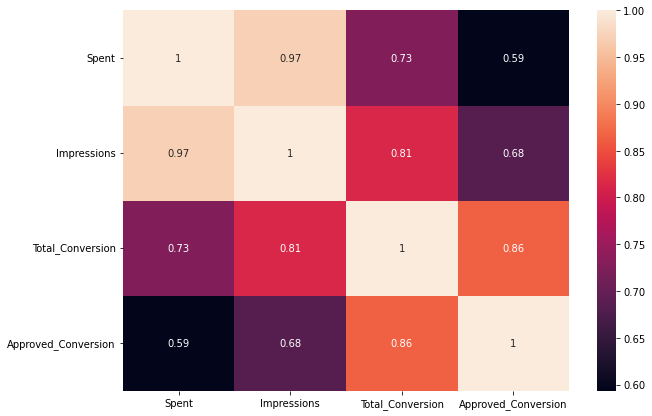

In [20]:
## assessing the relationship between Ad Spent, nr. of Impressions and Conversions
tmp = data[["Spent", "Impressions", "Total_Conversion", "Approved_Conversion"]].corr()

plt.figure(figsize=(10,7))
sns.heatmap(tmp, annot=True)

**Notes:**

There is a very clear relationship between Ad Spent and Impressions, as well as with Conversions.

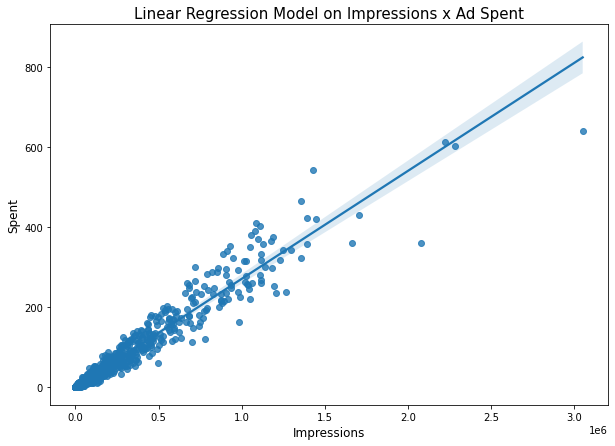

In [21]:
## Is there a relationship between Ad Spend and Conversion?
plt.figure(figsize=(10,7))

sns.regplot(x = "Impressions",
            y= "Spent",
           data= data)

plt.title("Linear Regression Model on Impressions x Ad Spent", size= 15)
plt.xlabel("Impressions", size=12)
plt.ylabel("Spent", size=12);

## 3. Feature Engineering

In [22]:
## calculating click-through-rate
data["CTR (%)"] = (data["Clicks"] / data["Impressions"]) * 100

In [23]:
## calculating Cost per Click
mask = (data["Clicks"] != 0)
data_valid = data[mask]

data["CpC"] = 0

data.loc[mask, "CpC"] = data["Clicks"] / data["Spent"]

In [24]:
data.head(3)

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CpC
0,708746,campaign_a,30-34,M,15,7350,1,1.43,2,1,0.013605,0.699301
1,708749,campaign_a,30-34,M,16,17861,2,1.82,2,0,0.011198,1.098901
2,708771,campaign_a,30-34,M,20,693,0,0.00,1,0,0.000000,0.000000


## 4. Data Preparation for Modeling

In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [26]:
## making a separate but identical dataframe to preprocess, in order to preserve the original data
processed_data = data.copy()

In [27]:
## encoding all categorical features in the dataset
encoder = LabelEncoder()

for col in ["xyz_campaign_id", "interest", "age", "gender"]:
    
    encoder.fit(processed_data[col])
    
    processed_data[col] = encoder.transform(processed_data[col])
    
    print(col, processed_data[col].nunique())

xyz_campaign_id 3
interest 40
age 4
gender 2


In [28]:
## scaling all continuous features of the dataset
scaler = MinMaxScaler()

for col in ["Impressions", "Spent", "Clicks", "CTR (%)", "CpC"]:
    
    scaler.fit(processed_data[[col]])
    
    processed_data[col] = scaler.transform(processed_data[[col]])

In [29]:
processed_data.head(3)

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR (%),CpC
0,708746,0,0,1,3,0.002380,0.002375,0.002235,2,1,0.128435,0.125874
1,708749,0,0,1,4,0.005824,0.004751,0.002844,2,0,0.105705,0.197802
2,708771,0,0,1,7,0.000199,0.000000,0.000000,1,0,0.000000,0.000000


## 5. Modeling

In [38]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate

---

**Test whether presence of cluster significantly impacts regression performance**

In [31]:
## Clustering ad campaigns to create a further feature
km = KMeans(n_clusters= 5)

km.fit(processed_data.drop(["Total_Conversion", "Approved_Conversion"], axis= 1))

processed_data["Cluster"] = km.labels_

----

In [32]:
forest = RandomForestRegressor(n_estimators= 100)

X = processed_data.drop(["ad_id","Approved_Conversion", "Total_Conversion"], axis= 1)
y = processed_data["Approved_Conversion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size= 0.33)

forest.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
forest.score(X_test, y_test)

0.5549915867449744

In [46]:
## cross validating the results

model = RandomForestRegressor()

X = processed_data.drop(["Total_Conversion", "Approved_Conversion"], axis=1)
y = processed_data["Approved_Conversion"]

cv_result = cross_validate(model, 
                          X,
                          y,
                          cv= 5,
                          scoring= ["r2", "neg_mean_squared_error"])

cv_result["test_neg_mean_squared_error"].mean()

-1.8999998919788557

## 6. Evaluation

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
y_pred = forest.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)

In [36]:
mse

1.5951335978835977

## Bonus Section: Building a ML - Pipeline

# Sandbox

### Open Questions:

1. Optimal Number of Clusters? Does Clustering as Feature Engineering even make Sense here?
2. What is the right algorithm here?
3. Domain knowledge: does it even make sense to run a regression here?
4. Preprocessing: does it make sense to scale y?
5. What are loss metrics again?